In [3]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('dummy_web_traffic_revenue_data.csv')

# You can also do other operations, like inspecting the first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1096 non-null   object 
 1   Google_Desktop_Visits         1096 non-null   int64  
 2   Google_Desktop_Conversions    1096 non-null   int64  
 3   Google_Mobile_Visits          1096 non-null   int64  
 4   Google_Mobile_Conversions     1096 non-null   int64  
 5   Google_Spend                  1096 non-null   float64
 6   Google_Revenue                1096 non-null   int64  
 7   Google_ROAS                   1096 non-null   float64
 8   Facebook_Desktop_Visits       1096 non-null   int64  
 9   Facebook_Desktop_Conversions  1096 non-null   int64  
 10  Facebook_Mobile_Visits        1096 non-null   int64  
 11  Facebook_Mobile_Conversions   1096 non-null   int64  
 12  Facebook_Spend                1096 non-null   float64
 13  Fac

In [58]:
# Drop any column with "Conversions" in its name
columns_to_drop = [col for col in df.columns if 'Conversions' in col]
df = df.drop(columns_to_drop, axis=1)

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df['Date'] = pd.to_datetime(df['Date'])
df.fillna(0, inplace=True)  # Example of filling missing values

In [68]:
# Feature and target selection
features = [
    'Google_Desktop_Visits', 'Google_Mobile_Visits', 'Google_Spend',
    'Facebook_Desktop_Visits', 'Facebook_Mobile_Visits', 'Facebook_Spend',
    'Direct_Desktop_Visits', 'Direct_Mobile_Visits', 'Direct_Spend', 'Bounce_Rate',
    'Avg_Session_Duration', 'Pages_Per_Session', 'Conversion_Rate', 'Total_Spend'
]

target = 'Total_Revenue'

In [70]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [73]:
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.8838317819180889


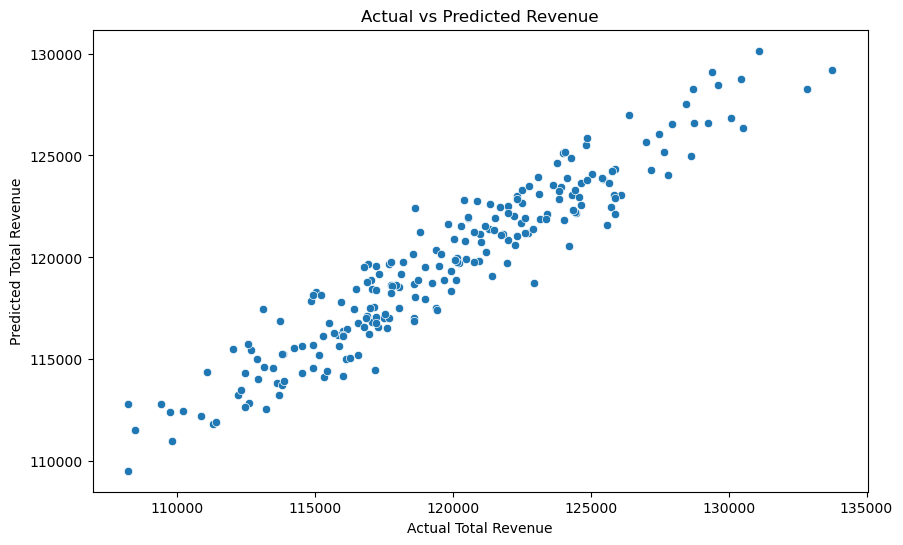

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Total Revenue')
plt.ylabel('Predicted Total Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()

                    Feature  Importance
4    Facebook_Mobile_Visits    0.269225
7      Direct_Mobile_Visits    0.253126
1      Google_Mobile_Visits    0.247830
12          Conversion_Rate    0.135219
6     Direct_Desktop_Visits    0.011093
5            Facebook_Spend    0.010630
3   Facebook_Desktop_Visits    0.010204
10     Avg_Session_Duration    0.010203
0     Google_Desktop_Visits    0.009955
9               Bounce_Rate    0.009522
2              Google_Spend    0.009038
11        Pages_Per_Session    0.008763
8              Direct_Spend    0.007698
13              Total_Spend    0.007495


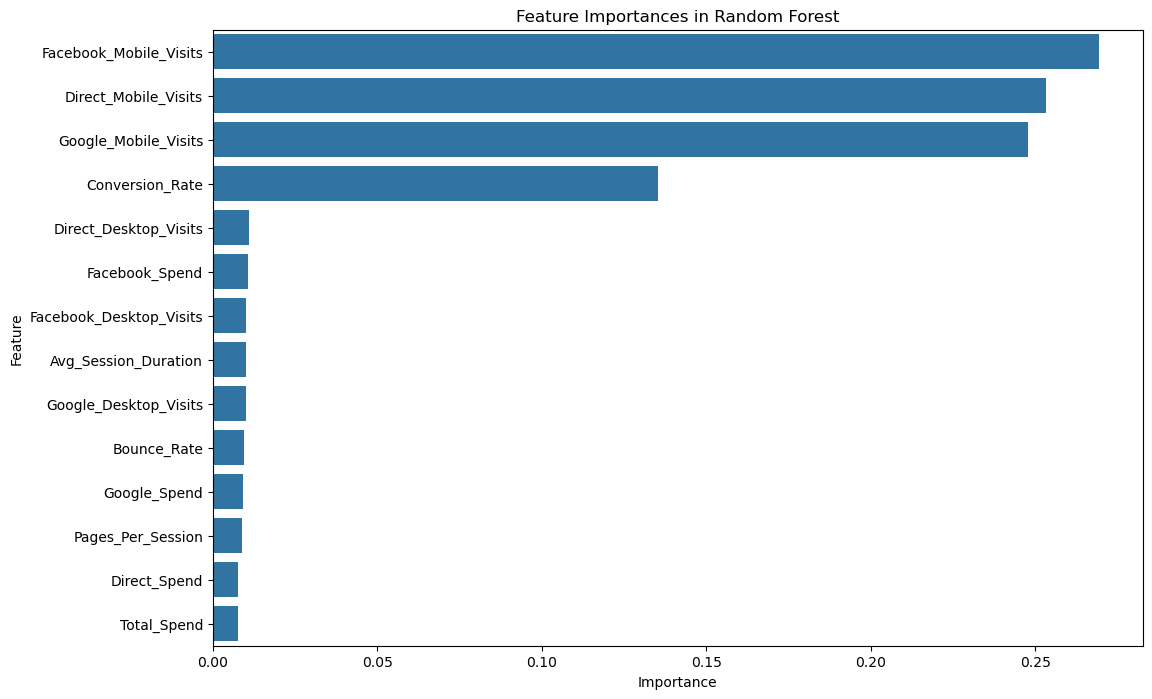

In [78]:
# Feature Importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(feature_importance_df)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest')
plt.show()